


<br><font color = #000066 size=6> Métodos Cuantitativos en Finanzas </font> 



 <br><font color = silver size=5> Equipo:</font>

* Romero Davila Junue ELizabeth
* Rojas Bautista Alan Daniel  
* Rodríguez Zúñiga Rubén
 
 <br><font color = silver size=2> September,2022 </font>

# Importación de librerias

In [114]:
# Importación de librerias para manipulación de datos
import pandas as pd 
import numpy as np

# Importación de librerias de yahoo finance 
import yfinance as yf 

# Importación cufflinks para visualización 
import cufflinks as cf
cf.set_config_file(offline=True)

# Libreria para ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

# Importación de scipy.stats para kurtosis, skew
from scipy.stats import kurtosis, skew

# Importacón de scipy.stats para QQ-plot
from scipy import stats
import matplotlib.pyplot as plt

# Importación scipy.stats para ACF
from statsmodels.graphics.tsaplots import plot_acf

# Extracción de datos

Para este analisis se extraen los datos cierre del SPDR® S&P 500 (SPY) del periodo del **01 de Enero del 2008** al **12 de Septiembre de 2022** 

In [115]:
# Se obtienen los datos especificando las fechas de inicio y finalización
df = yf.download('SPY', start='2008-01-01', end='2022-09-12', progress=False)['Close']

# Se muestra el marco de datos
df

Date
2008-01-02 144.929993
2008-01-03 144.860001
2008-01-04 141.309998
2008-01-07 141.190002
2008-01-08 138.910004
 ... 
2022-09-02 392.239990
2022-09-06 390.760010
2022-09-07 397.779999
2022-09-08 400.380005
2022-09-09 406.600006
Name: Close, Length: 3699, dtype: float64

# Análisis en una semana 

In [116]:
# Remuestreo para obtener valores semanales a partir de la serie de tiempo diaria
df_semanal = df.resample('W').last()

# Se muestra el marco de datos 
df_semanal

Date
2008-01-06 141.309998
2008-01-13 140.149994
2008-01-20 132.059998
2008-01-27 133.039993
2008-02-03 139.580002
 ... 
2022-08-14 427.100006
2022-08-21 422.140015
2022-08-28 405.309998
2022-09-04 392.239990
2022-09-11 406.600006
Freq: W-SUN, Name: Close, Length: 767, dtype: float64

## Evolución

In [117]:
#Mostramos gráfica de la evolución
df_semanal.iplot(kind='line',title='SPY Precio Semanal')

In [118]:
# Efectuando el cálculo de rendimientos logarítmicos normales

# Se usa la función de registro "numpy" para derivar retornos normales de registro
retornos_semanales = np.log(df_semanal).diff().dropna()

#Se muestran las ultimas cinco filas del marco de datos para verificar la salida
retornos_semanales.head()

Date
2008-01-13 -0.008243
2008-01-20 -0.059457
2008-01-27 0.007393
2008-02-03 0.047988
2008-02-10 -0.047763
Freq: W-SUN, Name: Close, dtype: float64

## Transformación logaritmica

In [119]:
# Plot de los retornos
retornos_semanales.iplot(title='Transformación logaritmica semanal')

## Histograma

In [120]:
# Grafica de distribución de rendimientos "log normal" 
retornos_semanales.iplot(kind='histogram', title = 'Histograma de los retornos semanales ')

## Momentos

In [121]:
# Se calcula la media, la desviación estándar y el sesgo
# Curtosis (Si es Verdadero, se usa la definición de "Fisher" (normal ==> 0.0). Si es Falso, se usa la definición de "Pearson" (normal ==> 3.0).)
pd.DataFrame({'Mean': round(np.mean(retornos_semanales),5),'SD': round(np.std(retornos_semanales),5),'Kurtosis':round(kurtosis(retornos_semanales,fisher=True),5),'Skew':round(skew(retornos_semanales),5)},index={'Statistics'})

,Mean,SD,Kurtosis,Skew
Statistics,0.00138,0.02675,10.01308,-1.09046


## QQ-Plot

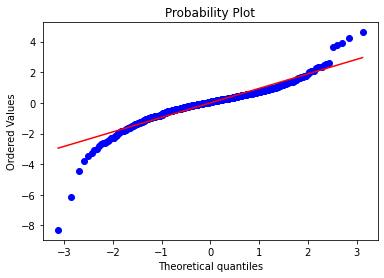

In [122]:
#Creamos QQ-Plot
stats.probplot((retornos_semanales-np.mean(retornos_semanales))/np.std(retornos_semanales), dist="norm", plot=plt)
plt.show() #mostramos grafica

## ACF

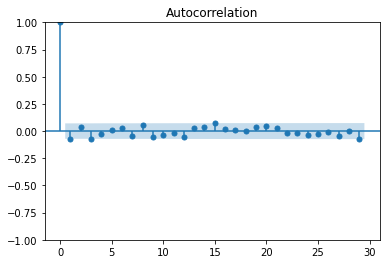

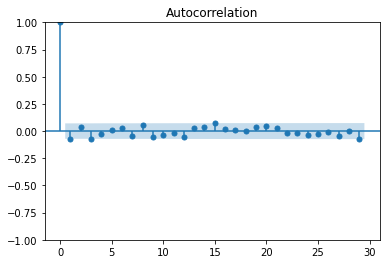

In [123]:
# Plot de auto correlacion
plot_acf(retornos_semanales)

## ACF: Absoluto

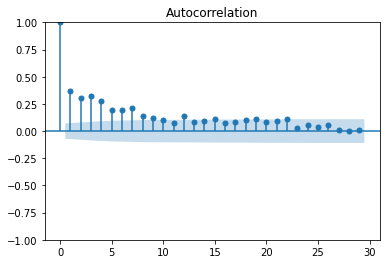

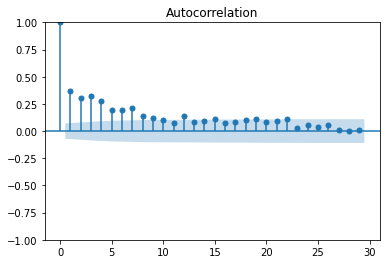

In [124]:
# Plot de auto correlación
plot_acf(np.abs(retornos_semanales))

# Análisis en un mes

In [125]:
# Remuestreo para obtener valores mensuales a partir de series temporales diarias
df_mensual = df.resample('M').last()

# Para verificar la salida, se muestran las ultimas cinco filas del marco de datos 
df_mensual.head()

Date
2008-01-31 137.369995
2008-02-29 133.820007
2008-03-31 131.970001
2008-04-30 138.259995
2008-05-31 140.350006
Freq: M, Name: Close, dtype: float64

## Evolución 

In [126]:
#Mostramos la gráfica evolución
df_mensual.iplot(kind='line',title='SPY Precio Mensual')

In [127]:
# Efectuando el cálculo de rendimientos logarítmicos normales

# Se usa la función de registro "numpy" para derivar retornos normales de registro
retornos_mensuales = np.log(df_mensual).diff().dropna()

#Se muestran las últimas cinco filas del marco de datos para verificar la salida
retornos_mensuales.head(5)

Date
2008-02-29 -0.026182
2008-03-31 -0.013921
2008-04-30 0.046561
2008-05-31 0.015003
2008-06-30 -0.092265
Freq: M, Name: Close, dtype: float64

## Transformación logaritmica

In [128]:
# Plot de los retornos
retornos_mensuales.iplot(title='Transformación logaritmica mensual')

## Histograma

In [129]:
# Grafica de distribución de rendimientos "log normal" 
retornos_mensuales.iplot(kind='histogram', title = 'Histograma de los retornos mensuales ')

## Momentos

In [130]:
# Se calcula la media, la desviación estándar y el sesgo
# Curtosis (Si es Verdadero, se usa la definición de "Fisher" (normal ==> 0.0). Si es Falso, se usa la definición de "Pearson" (normal ==> 3.0).)
pd.DataFrame({'Mean': round(np.mean(retornos_mensuales),5),'SD': round(np.std(retornos_mensuales),5),'Kurtosis':round(kurtosis(retornos_mensuales,fisher=True),5),'Skew':round(skew(retornos_mensuales),5)},index={'Statistics'})

,Mean,SD,Kurtosis,Skew
Statistics,0.00617,0.04644,1.44737,-0.795


## QQ-Plot

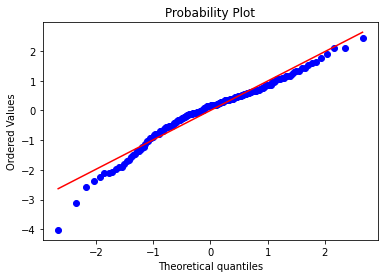

In [131]:
#Creamos QQ-Plot
stats.probplot((retornos_mensuales-np.mean(retornos_mensuales))/np.std(retornos_mensuales), dist="norm", plot=plt)
plt.show() #mostramos grafica

## ACF

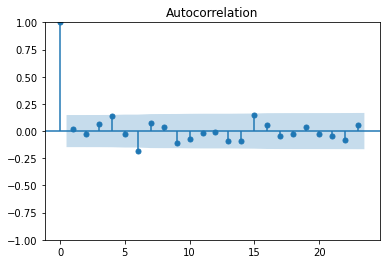

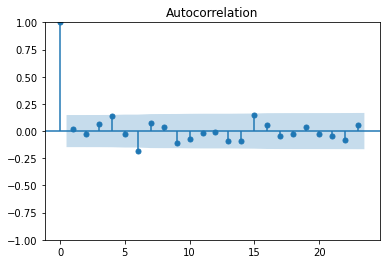

In [132]:
# Plot de auto correlacion
plot_acf(retornos_mensuales)

## ACF: Absoluto

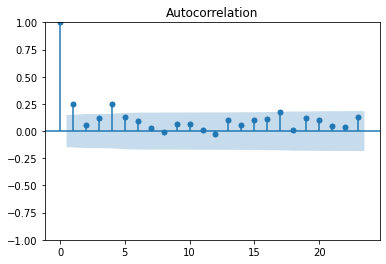

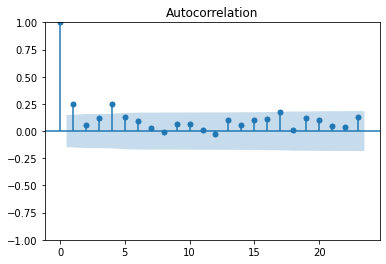

In [133]:
# Plot de auto correlación
plot_acf(np.abs(retornos_mensuales))

# Análisis en un año

In [134]:
# Remuestreo para obtener valores anuales a partir de series temporales diarias
df_anual = df.resample('Y').last()

# Para verificar la salida, se muestran las ultimas cinco filas del marco de datos 
df_anual.head()

Date
2008-12-31 90.239998
2009-12-31 111.440002
2010-12-31 125.750000
2011-12-31 125.500000
2012-12-31 142.410004
Freq: A-DEC, Name: Close, dtype: float64

## Evolución

In [135]:
#Mostramos la grafica de evolución
df_anual.iplot(kind='line',title='SPY Precio Anual')

In [136]:
# Efectuando el cálculo de rendimientos logarítmicos normales

# Se usa la función de registro "numpy" para derivar retornos normales de registro
retornos_anuales = np.log(df_anual).diff().dropna()

#Se muestran las últimas cinco filas del marco de datos para verificar la salida
retornos_anuales.head(5)

Date
2009-12-31 0.211014
2010-12-31 0.120809
2011-12-31 -0.001990
2012-12-31 0.126404
2013-12-31 0.259969
Freq: A-DEC, Name: Close, dtype: float64

## Transformación logaritmica

In [137]:
# Plot de los retornos
retornos_anuales.iplot(title='Transformación logaritmica anual')

## Histograma

In [138]:
# Grafica de distribución de rendimientos "log normal" 
retornos_anuales.iplot(kind='histogram', title = 'Histograma de los retornos anuales')

## Momentos

In [139]:
# Se calcula la media, la desviación estándar y el sesgo
# Curtosis (Si es Verdadero, se usa la definición de "Fisher" (normal ==> 0.0). Si es Falso, se usa la definición de "Pearson" (normal ==> 3.0).)
pd.DataFrame({'Mean': round(np.mean(retornos_anuales),5),'SD': round(np.std(retornos_anuales),5),'Kurtosis':round(kurtosis(retornos_anuales,fisher=True),5),'Skew':round(skew(retornos_anuales),5)},index={'Statistics'})

,Mean,SD,Kurtosis,Skew
Statistics,0.10753,0.12082,-0.50889,-0.63956


## QQ-Plot

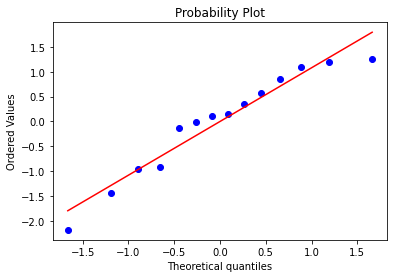

In [140]:
#Creamos QQ-Plot
stats.probplot((retornos_anuales-np.mean(retornos_anuales))/np.std(retornos_anuales), dist="norm", plot=plt)
plt.show() #mostramos grafica

## ACF

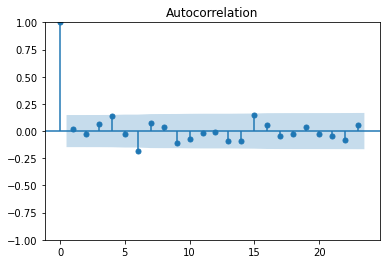

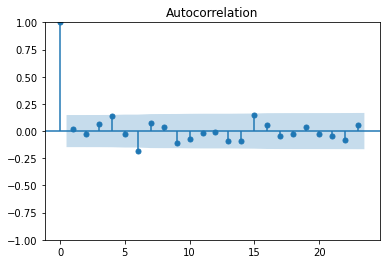

In [141]:
# Plot de auto correlacion
plot_acf(retornos_mensuales)

## ACF:Absoluto

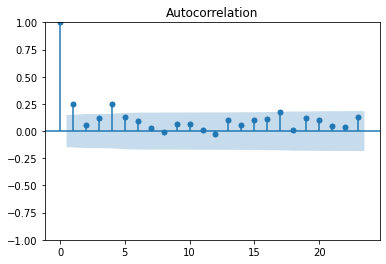

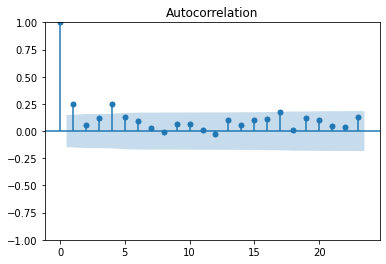

In [142]:
# Plot de auto correlación
plot_acf(np.abs(retornos_mensuales))

# Análisis de ultimos 5 años

In [143]:


# Se muestran las últimas cinco filas del marco de datos de  los cierres anuales (para analizar los ultimos 5 años)
df_anual_5=df_anual.tail(5)
df_anual_5

Date
2018-12-31 249.919998
2019-12-31 321.859985
2020-12-31 373.880005
2021-12-31 474.959991
2022-12-31 406.600006
Freq: A-DEC, Name: Close, dtype: float64

## Evolución

In [144]:
#Mostramos gráfica de la evoluacion 
df_anual_5.iplot(kind='line',title='SPY Precio Anual(Ultimos 5 años)')

In [145]:
# Efectuando el cálculo de rendimientos logarítmicos normales

# Se usa la función de registro "numpy" para derivar retornos normales de registro
retornos_anuales_5 = np.log(df_anual_5).diff().dropna()

#Se muestran las últimas cinco filas del marco de datos para verificar la salida
##retornos_anuales_5.head(6)
retornos_anuales_5

Date
2019-12-31 0.252976
2020-12-31 0.149818
2021-12-31 0.239296
2022-12-31 -0.155401
Freq: A-DEC, Name: Close, dtype: float64

## Transformación logaritmica

In [146]:
# Plot de los retornos
retornos_anuales_5.iplot(title='Transformación logaritmica anual (Ultimos 5 años)')

## Histograma

In [147]:
# Grafica de distribución de rendimientos "log normal" 
retornos_anuales_5.iplot(kind='histogram', title = 'Histograma de los retornos anuales (Ultimos 5 años)')

## Momentos

In [148]:
# Se calcula la media, la desviación estándar y el sesgo
# Curtosis (Si es Verdadero, se usa la definición de "Fisher" (normal ==> 0.0). Si es Falso, se usa la definición de "Pearson" (normal ==> 3.0).)
pd.DataFrame({'Mean': round(np.mean(retornos_anuales_5),5),'SD': round(np.std(retornos_anuales_5),5),'Kurtosis':round(kurtosis(retornos_anuales_5,fisher=True),5),'Skew':round(skew(retornos_anuales),5)},index={'Statistics'})

,Mean,SD,Kurtosis,Skew
Statistics,0.12167,0.1648,-0.83672,-0.63956


## QQ-Plot

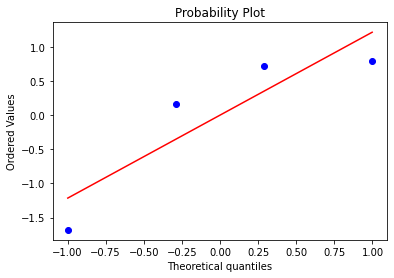

In [149]:
#Creamos QQ-Plot
stats.probplot((retornos_anuales_5-np.mean(retornos_anuales_5))/np.std(retornos_anuales_5), dist="norm", plot=plt)
plt.show() #mostramos gráfica

## ACF

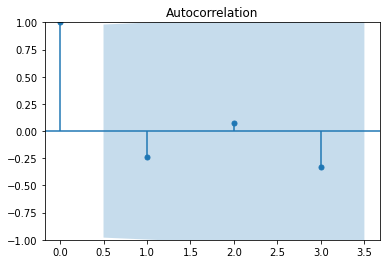

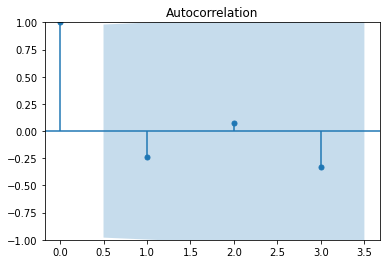

In [150]:
# Plot de auto correlacion
plot_acf(retornos_anuales_5)

## ACF:Absoluto

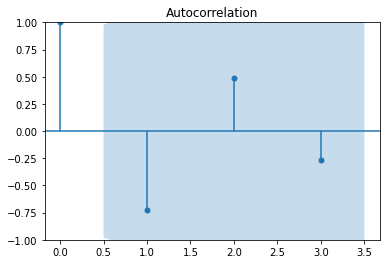

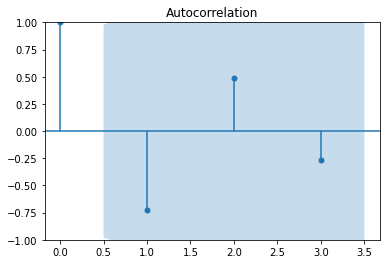

In [151]:
# Plot de auto correlación
plot_acf(np.abs(retornos_anuales_5))

# Conclusiones
Como pudimos observar, entre mas largo el periodo de tiempo, la serie no posee una distribucion normal, sin embargo en periodos cortos las colas son mas largas pero la densidad en el centro se asemeja mas a una normal (sobre todo en el retorno mensual).

Con respecto a la autocorrelación, se sigue que entre mas largo el periodo y menor el tamaño de muestra,  este tiende a ser mas variable y con bandas de confianza mas extensas.